In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/Train_call.txt',delimiter = '\t')
labels = pd.read_csv('../data/Train_clinical.txt',delimiter = '\t')

In [3]:
data.head()

,Chromosome,Start,End,Nclone,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,...,Array.64,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130
0,1,2927,43870,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
1,1,85022,216735,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
2,1,370546,372295,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
3,1,471671,786483,5,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0
4,1,792533,907406,13,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0


In [4]:
data = data.transpose()
data

,0,1,2,3,4,5,6,7,8,9,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
Chromosome,1,1,1,1,1,1,1,1,1,1,...,23,23,23,23,23,23,23,23,23,23
Start,2927,85022,370546,471671,792533,912799,1271190,1676445,1738295,2481927,...,151067607,152422390,152552851,152576854,152994680,153062077,153466463,153504394,153938998,153997146
End,43870,216735,372295,786483,907406,1266212,1590570,1703748,2477597,2562342,...,152416606,152548587,152570071,152935130,153054487,153452633,153491568,153933426,153989329,154492924
Nclone,3,4,4,5,13,96,45,4,104,14,...,159,20,6,64,5,57,4,55,5,43
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array.10,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
Array.123,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.100,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
data = data[4:]
data

,0,1,2,3,4,5,6,7,8,9,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
Array.34,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.67,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.24,0,0,0,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
Array.22,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array.10,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
Array.123,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.100,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [6]:
data = data.reset_index()
data

,index,0,1,2,3,4,5,6,7,8,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Array.10,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
96,Array.123,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
97,Array.100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
98,Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
data.rename(columns={'index':'Sample'}, inplace=True)
data.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2824,2825,2826,2827,2828,2829,2830,2831,2832,2833
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [8]:
labels.head()

,Sample,Subgroup
0,Array.129,HER2+
1,Array.34,HR+
2,Array.67,HR+
3,Array.24,Triple Neg
4,Array.22,Triple Neg


In [9]:
# Combine labels and instances
combined = pd.merge(data,labels,on='Sample',)
combined

,Sample,0,1,2,3,4,5,6,7,8,...,2825,2826,2827,2828,2829,2830,2831,2832,2833,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Array.10,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,HER2+
96,Array.123,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
97,Array.100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
98,Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,HR+


In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [11]:
X = combined.iloc[:,1:2835]
y = combined['Subgroup']

combined.head()

,Sample,0,1,2,3,4,5,6,7,8,...,2825,2826,2827,2828,2829,2830,2831,2832,2833,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg


In [12]:
# check if class lables are balanced or not
y.value_counts()

HR+           36
HER2+         32
Triple Neg    32
Name: Subgroup, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20, random_state=42)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (80, 2834)
X_test (20, 2834)
y_train (80,)
y_test (20,)


In [14]:
y_train.value_counts()

HR+           29
Triple Neg    26
HER2+         25
Name: Subgroup, dtype: int64

# Feature selection 

### multinomial logistic regression

In [15]:
# # Create the RFE object and compute a cross-validated score.
# lr = LogisticRegression(multi_class='multinomial')
# # The "accuracy" scoring shows the proportion of correct classifications

# min_features_to_select = 1  # Minimum number of features to consider
# rfecv_lr = RFECV(
#     estimator=lr,
#     step=1,
#     cv=StratifiedKFold(5),
#     scoring="accuracy",
#     min_features_to_select=min_features_to_select,
# )
# rfecv_lr.fit(X_train, y_train)

# print("Optimal number of features : %d" % rfecv_lr.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv_lr.grid_scores_) + min_features_to_select),
#     rfecv_lr.grid_scores_,
# )
# plt.title("RFECV of Multinomial Logistic Regression")
# plt.legend(['1cv', '2cv', '3cv', '4cv', '5cv'], loc=4)
# plt.show()

In [16]:
# # selected features
# fs_lr = rfecv_lr.get_feature_names_out()
# fs_lr

In [17]:
# # get selected features for training set
# X_train_fs_lr = pd.DataFrame(rfecv_lr.transform(X_train))

# # rename new dataframe for training set
# for i, col in enumerate(X_train_fs_lr.columns):
#     X_train_fs_lr.rename(columns={col:fs_lr[i]}, inplace=True)

# X_train_fs_lr


In [18]:
# # get selected features for test set
# X_test_fs_lr = pd.DataFrame(rfecv_lr.transform(X_test))

# # rename new dataframe for test set
# for i, col in enumerate(X_test_fs_lr.columns):
#     X_test_fs_lr.rename(columns={col:fs_lr[i]}, inplace=True)

# X_test_fs_lr


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# # Create the RFE object and compute a cross-validated score.
# rf = RandomForestClassifier(random_state = 42)
# # The "accuracy" scoring shows the proportion of correct classifications

# min_features_to_select = 1  # Minimum number of features to consider
# rfecv_rf = RFECV(
#     estimator=rf,
#     step=1,
#     cv=StratifiedKFold(5),
#     scoring="accuracy",
#     min_features_to_select=min_features_to_select,
# )
# rfecv_rf.fit(X_train, y_train)

# print("Optimal number of features : %d" % rfecv_rf.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv_rf.grid_scores_) + min_features_to_select),
#     rfecv_rf.grid_scores_,
# )
# plt.title("RFECV of Random Forest")
# plt.legend(['1cv', '2cv', '3cv', '4cv', '5cv'], loc=4)
# plt.show()

### XGboost

In [21]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder 

In [22]:
y_train

55    Triple Neg
88    Triple Neg
26         HER2+
42           HR+
69           HR+
         ...    
60         HER2+
71         HER2+
14    Triple Neg
92    Triple Neg
51           HR+
Name: Subgroup, Length: 80, dtype: object

In [23]:
# label encode y_train for xgboost
lc = LabelEncoder() 
lc = lc.fit(y_train) 
lc_y_train = lc.transform(y_train)

# transform lc_y_train into series
lc_y_train = pd.Series(lc_y_train)

In [24]:
# label encode y_test
lc1 = lc.fit(y_test) 
lc_y_test = lc1.transform(y_test)

# transform lc_y_test into series
lc_y_test = pd.Series(lc_y_test)

In [25]:
# # Create the RFE object and compute a cross-validated score.
# xgb = XGBClassifier(random_state=42)
# # The "accuracy" scoring shows the proportion of correct classifications

# min_features_to_select = 1  # Minimum number of features to consider
# rfecv_xgb = RFECV(
#     estimator=xgb,
#     step=1,
#     cv=StratifiedKFold(5),
#     scoring="accuracy",
#     min_features_to_select=min_features_to_select,
# )
# rfecv_xgb.fit(X_train, lc_y_train)

# print("Optimal number of features : %d" % rfecv_xgb.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv_xgb.grid_scores_) + min_features_to_select),
#     rfecv_xgb.grid_scores_,
# )
# plt.title("RFECV of XGBoost")
# plt.legend(['1cv', '2cv', '3cv', '4cv', '5cv'], loc=4)
# plt.show()

In [26]:
# # selected features
# fs_xgb = rfecv_xgb.get_feature_names_out()
# fs_xgb

In [27]:
# # get selected features for training set
# X_train_fs_xgb = pd.DataFrame(rfecv_xgb.transform(X_train))

# # rename new dataframe for training set
# for i, col in enumerate(X_train_fs_xgb.columns):
#     X_train_fs_xgb.rename(columns={col:fs_xgb[i]}, inplace=True)

# X_train_fs_xgb


In [28]:
# # get selected features for test set
# X_test_fs_xgb = pd.DataFrame(rfecv_xgb.transform(X_test))

# # rename new dataframe for test set
# for i, col in enumerate(X_test_fs_xgb.columns):
#     X_test_fs_xgb.rename(columns={col:fs_xgb[i]}, inplace=True)

# X_test_fs_xgb

### Chi-square
Chi-square is not a good method since we have negative values in our data set.

### Mutual information

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib.pyplot import figure
from matplotlib import pyplot

In [30]:
mi_score = mutual_info_classif(X_train,y_train, random_state=100)
pd.DataFrame(mi_score)

,0
0,0.022109
1,0.100155
2,0.003009
3,0.081279
4,0.015207
...,...
2829,0.005137
2830,0.022582
2831,0.002587
2832,0.075648


In [31]:
mi_score.mean()

0.03544600644160345

Feature 0: 0.022109
Feature 1: 0.100155
Feature 2: 0.003009
Feature 3: 0.081279
Feature 4: 0.015207
Feature 5: 0.043071
Feature 6: 0.153591
Feature 7: 0.000000
Feature 8: 0.026535
Feature 9: 0.089038
Feature 10: 0.139435
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.166814
Feature 14: 0.000000
Feature 15: 0.077460
Feature 16: 0.205600
Feature 17: 0.105897
Feature 18: 0.089439
Feature 19: 0.000000
Feature 20: 0.036290
Feature 21: 0.071565
Feature 22: 0.000000
Feature 23: 0.025602
Feature 24: 0.076239
Feature 25: 0.000000
Feature 26: 0.037511
Feature 27: 0.000000
Feature 28: 0.000000
Feature 29: 0.000000
Feature 30: 0.000000
Feature 31: 0.104604
Feature 32: 0.000000
Feature 33: 0.055996
Feature 34: 0.105985
Feature 35: 0.000000
Feature 36: 0.000000
Feature 37: 0.027161
Feature 38: 0.048241
Feature 39: 0.105548
Feature 40: 0.000000
Feature 41: 0.052970
Feature 42: 0.051369
Feature 43: 0.040241
Feature 44: 0.000000
Feature 45: 0.000000
Feature 46: 0.000000
Feature 47: 0.041815
Fe

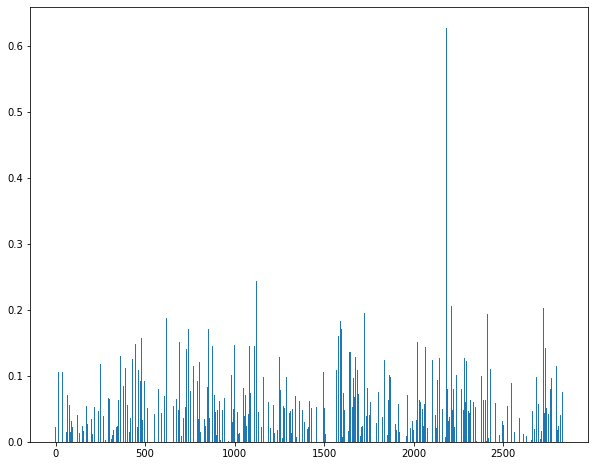

In [32]:
# what are scores for the features
for i in range(len(mi_score)):
	print('Feature %d: %f' % (i, mi_score[i]))
# plot the scores
figure(figsize=(10,8))
pyplot.bar([i for i in range(len(mi_score))], mi_score)
pyplot.show()

In [33]:
# calculate the mean score
fs_mutinfo_all_df = pd.DataFrame(mi_score)
fs_mutinfo_all_df.rename(columns={0:'Scores'}, inplace=True)
mean_mutinfo = fs_mutinfo_all_df['Scores'].mean()
print('Mean score of mutual information:', mean_mutinfo)

# select features higher or equal to the mean
fs_mutinfo = fs_mutinfo_all_df.loc[fs_mutinfo_all_df['Scores'] >= 0.18]

Mean score of mutual information: 0.03544600644160345


In [34]:
len(fs_mutinfo)

33

In [36]:
fs_mutinfo.sort_values(by='Scores', ascending=False).to_csv('MI_scores.csv')

In [37]:
# get index of selected features
selected_features_list= list(fs_mutinfo.T.columns)

# fit X_train and X_test with selected features
X_train_fs_mutinfo = X_train.filter(items=selected_features_list, axis=1)
X_test_fs_mutinfo = X_test.filter(items=selected_features_list, axis=1)
X_train_fs_mutinfo

,16,64,236,262,347,373,489,620,627,691,...,2065,2155,2172,2184,2212,2213,2319,2413,2663,2726
55,-1,0,-1,1,0,-1,0,0,1,-1,...,1,-1,-1,1,0,0,1,-1,0,0
88,0,0,0,1,-1,0,0,0,0,-1,...,-1,0,0,0,0,0,0,0,0,0
26,1,0,1,1,0,0,0,1,0,0,...,-1,-1,2,2,-1,-1,0,-1,0,0
42,1,-1,1,1,-1,1,1,0,0,0,...,-1,-1,-1,-1,-1,-1,1,-1,-1,-1
69,1,0,1,1,0,0,0,0,0,0,...,-1,2,2,0,-1,-1,1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,-1,0,0,0,0,0,0,0,0,...,-1,0,1,2,0,0,0,0,0,0
71,1,0,1,1,0,0,0,0,0,0,...,-1,1,0,2,1,-1,1,-1,0,0
14,0,1,1,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,1,1
92,1,0,1,1,0,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [38]:
# # check overall distribution based on mutual information
# fs_mutinfo = SelectKBest(score_func=mutual_info_classif,k='all')
# fs_mutinfo.fit(X_train, y_train)

# # X_train_fs = fs_mutinfo.transform(X_train)
# # X_test_fs = fs.transform(X_test)

# # check overall distribution based on mutual information 1
# fs_mutinfo1 = SelectKBest(score_func=mutual_info_classif,k='all')
# fs_mutinfo1.fit(X_train, y_train)

In [39]:
# # what are scores for the features
# for i in range(len(fs_mutinfo.scores_)):
# 	print('Feature %d: %f' % (i, fs_mutinfo.scores_[i]))
# # plot the scores
# figure(figsize=(10,8))
# pyplot.bar([i for i in range(len(fs_mutinfo.scores_))], fs_mutinfo.scores_)
# pyplot.show()

In [40]:
# # MI >= 0.05
# # calculate the mean score
# fs_mutinfo_all_df = pd.DataFrame(fs_mutinfo.scores_)
# fs_mutinfo_all_df.rename(columns={0:'Scores'}, inplace=True)
# mean_mutinfo = fs_mutinfo_all_df['Scores'].mean()
# print('Mean score of mutual information:', mean_mutinfo)

# # select features higher or equal to the mean
# fs_mutinfo = fs_mutinfo_all_df.loc[fs_mutinfo_all_df['Scores'] >= 0.05]

In [41]:
# # MI >= 0.07
# # calculate the mean score
# fs_mutinfo_all_df1 = pd.DataFrame(fs_mutinfo1.scores_)
# fs_mutinfo_all_df1.rename(columns={0:'Scores'}, inplace=True)
# mean_mutinfo1 = fs_mutinfo_all_df1['Scores'].mean()
# print('Mean score of mutual information:', mean_mutinfo1)

# # select features higher or equal to the mean
# fs_mutinfo1 = fs_mutinfo_all_df1.loc[fs_mutinfo_all_df1['Scores'] >= 0.07]

In [42]:
# # all features that have mutual information scores equal or above 0.05
# fs_mutinfo

In [43]:
# # all features that have mutual information scores equal or above 0.07
# fs_mutinfo1

In [44]:
# # Select the top features (features with mutual information score >= 0.05)
# fs_mutinfo = SelectKBest(score_func=mutual_info_classif, k=889)
# fs_mutinfo.fit(X_train, y_train)

# # list all selected features by from mutual information
# features_mutinfo = fs_mutinfo.get_feature_names_out()

# #####
# # Select the top features (features with mutual information score >= 0.07)
# fs_mutinfo1 = SelectKBest(score_func=mutual_info_classif, k=639)
# fs_mutinfo1.fit(X_train, y_train)

# # list all selected features by from mutual information
# features_mutinfo1 = fs_mutinfo1.get_feature_names_out()

In [45]:
# # get selected features for train and test sets
# X_train_fs_mutinfo = pd.DataFrame(fs_mutinfo.transform(X_train))
# X_test_fs_mutinfo = pd.DataFrame(fs_mutinfo.transform(X_test))

# # rename column names for train set 
# for i, col in enumerate(X_train_fs_mutinfo.columns):
#     X_train_fs_mutinfo.rename(columns={col:features_mutinfo[i]}, inplace=True)
    
# # rename column names for test set 
# for i, col in enumerate(X_test_fs_mutinfo.columns):
#     X_test_fs_mutinfo.rename(columns={col:features_mutinfo[i]}, inplace=True)

In [46]:
# # get selected features for train and test sets 1
# X_train_fs_mutinfo1 = pd.DataFrame(fs_mutinfo1.transform(X_train))
# X_test_fs_mutinfo1 = pd.DataFrame(fs_mutinfo1.transform(X_test))

# # rename column names for train set 
# for i, col in enumerate(X_train_fs_mutinfo1.columns):
#     X_train_fs_mutinfo1.rename(columns={col:features_mutinfo1[i]}, inplace=True)
    
# # rename column names for test set 
# for i, col in enumerate(X_test_fs_mutinfo1.columns):
#     X_test_fs_mutinfo1.rename(columns={col:features_mutinfo1[i]}, inplace=True)

## GridSearchCV 

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform
from sklearn import metrics   

### XGBoost

In [48]:
# define model 1
model_xgb = XGBClassifier(random_state=42,num_class=3,objective='multi:softmax')

# define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space_xgb = dict()
space_xgb['max_depth'] = range(3,10)
space_xgb['min_child_weight'] = range(1,6)
space_xgb['gamma'] = [i/10.0 for i in range(0,5)]
space_xgb['subsample'] = [i/10.0 for i in range(6,10)]
# space_xgb['colsample_bytree'] = [i/10.0 for i in range(6,10)]
space_xgb['reg_alpha'] = [1e-5, 1e-2, 0.1, 1, 100]

# define search_xgb
search_xgb = GridSearchCV(model_xgb, space_xgb, scoring='accuracy', n_jobs=-1, cv=5)

# execute search_xgb
result_xgb = search_xgb.fit(X_train_fs_mutinfo, lc_y_train)

# summarize result_xgb
print('Best Score: %s' % result_xgb.best_score_)
print('Best Hyperparameters: %s' % result_xgb.best_params_)

# print winning set of hyperparameters
from pprint import pprint
pprint(result_xgb.best_estimator_.get_params())

Best Score: 0.9125
Best Hyperparameters: {'gamma': 0.2, 'max_depth': 6, 'min_child_weight': 1, 'reg_alpha': 0.01, 'subsample': 0.8}
{'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0.2,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_class': 3,
 'num_parallel_tree': 1,
 'objective': 'multi:softmax',
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0.01,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': 'exact',
 'use_label_encoder': False,
 'validat

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# define model 1
model_rf = RandomForestClassifier(random_state=42)

# define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space_rf = dict()
space_rf['max_depth'] = [1,2,3,5,10,20]
space_rf['n_estimators'] = [1,5,10,15,20]
space_rf['min_samples_leaf'] = [1,2,3,4,5]
space_rf['bootstrap'] = [True, False]

# define search_rfspace_rf
search_space_rf = GridSearchCV(model_rf, space_rf, scoring='accuracy', n_jobs=-1, cv=5, verbose=True)

# execute search_rfspace_rf
result_rf = search_space_rf.fit(X_train_fs_mutinfo, y_train)

# summarize result_rfspace_rf
print('Best Score: %s' % result_rf.best_score_)
print('Best Hyperparameters: %s' % result_rf.best_params_)

# print winning set of hyperparameters
from pprint import pprint
pprint(result_rf.best_estimator_.get_params())

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Score: 0.85
Best Hyperparameters: {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 5}
{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
# define model 1
model_lr = LogisticRegression(multi_class='multinomial')

# define evaluation
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space_lr = dict()
space_lr['penalty'] = ['l1', 'l2']
space_lr['C'] = np.logspace(-4, 4, 20)
space_lr['solver'] = ['lbfgs']


# define search_lrspace_lrspace_lr
search_space_lr = GridSearchCV(model_lr, space_lr, scoring='accuracy', n_jobs=-1, cv=5, verbose=True)

# execute search_lrspace_lrspace_lr
result_lr = search_space_lr.fit(X_train_fs_mutinfo, y_train)

# summarize result_lrspace_lrspace_lr
print('Best Score: %s' % result_lr.best_score_)
print('Best Hyperparameters: %s' % result_lr.best_params_)

# print winning set of hyperparameters
from pprint import pprint
pprint(result_lr.best_estimator_.get_params())

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Score: 0.8375
Best Hyperparameters: {'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'lbfgs'}
{'C': 0.03359818286283781,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

# Model Evaluation

In [53]:
# optimal XGBoost 
opt_xgb = result_xgb.best_estimator_
# optimal Random Forest
opt_rf = result_rf.best_estimator_
# optimal Logistic Regression
opt_lr = result_lr.best_estimator_

In [54]:
from xgboost import plot_importance

In [55]:
X_train_fs_mutinfo.columns

Int64Index([  16,   64,  236,  262,  347,  373,  489,  620,  627,  691,  694,
             830, 1001, 1123, 1474, 1563, 1592, 1646, 1656, 1673, 1689, 1726,
            1912, 2065, 2155, 2172, 2184, 2212, 2213, 2319, 2413, 2663, 2726],
           dtype='int64')

In [56]:
## Aligned feature names 

X_train_fs_mutinfo_list = list(X_train_fs_mutinfo.columns)

# Random Forest
feature_importances_rf = pd.Series(opt_rf.feature_importances_)
feature_importances_rf.index = X_train_fs_mutinfo_list

# Logist Regression
feature_importances_lr = pd.Series(opt_lr.coef_[0])
feature_importances_lr.index = X_train_fs_mutinfo_list

In [57]:
# Feature importances

# XGBoost
feature_importances_xgb = pd.Series(opt_xgb.get_booster().get_score(importance_type='gain'))
feature_importances_xgb.sort_values(ascending=False).to_csv('XGB_feature_importance.csv')

# Random Forest
feature_importances_rf.sort_values(ascending=False).to_csv('RF_feature_importance.csv')

# Logistic Regression
feature_importances_lr.sort_values(ascending=False).to_csv('LR_feature_importance.csv')


### Multi-label confusion matrix

In [58]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

In [59]:
# XGBoost prediction
y_pred_train_xgb = opt_xgb.predict(X_train_fs_mutinfo)

# Random Forest prediction
y_pred_train_rf = opt_rf.predict(X_train_fs_mutinfo)

# Logistic Regression prediction
y_pred_train_lr = opt_lr.predict(X_train_fs_mutinfo)

In [60]:
# Confusion matrix for XGBoost
confusion_mx_train_xgb = confusion_matrix(lc_y_train, y_pred_train_xgb)

# Confusion matrix for Random Forest
confusion_mx_train_rf = confusion_matrix(y_train, y_pred_train_rf)

# Confusion matrix for Logistic Regression
confusion_mx_train_lr = confusion_matrix(y_train, y_pred_train_lr)

In [61]:
# Creating dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

# XGBoost
confusion_mx_train_xgb_df = pd.DataFrame(confusion_mx_train_xgb,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

# Random Forest
confusion_mx_train_rf_df = pd.DataFrame(confusion_mx_train_rf,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

# Logistic Regression
confusion_mx_train_lr_df = pd.DataFrame(confusion_mx_train_lr,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

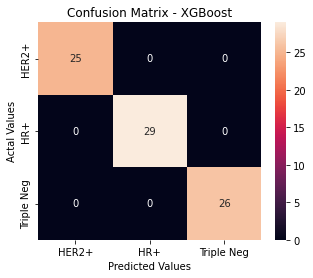

In [62]:
#Plotting the confusion matrix - XGBoost
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_train_xgb_df, annot=True)
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


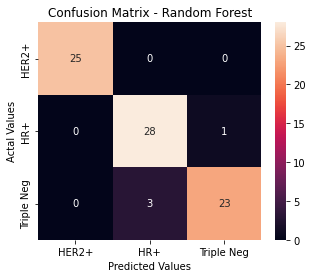

In [63]:
#Plotting the confusion matrix - Random Forest
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_train_rf_df, annot=True)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

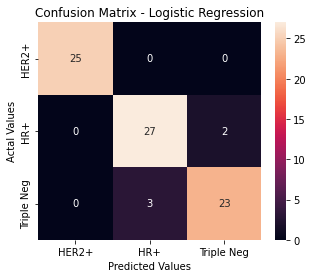

In [64]:
#Plotting the confusion matrix - Logistic Regression
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_train_lr_df, annot=True)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Multi-label F1-score

In [65]:
from sklearn.metrics import f1_score

In [66]:
# get f1 score
from sklearn.metrics import f1_score
f1_score_xgb = f1_score(lc_y_train, y_pred_train_xgb, average='micro')
f1_score_rf = f1_score(y_train, y_pred_train_rf, average='micro')
f1_score_lr = f1_score(y_train, y_pred_train_lr, average='micro')


print('f1 score - XGBoost: ', f1_score_xgb)
print('f1 score - Random Forest: ', f1_score_rf)
print('f1 score - Logistic Regression: ', f1_score_lr)

f1 score - XGBoost:  1.0
f1 score - Random Forest:  0.9500000000000001
f1 score - Logistic Regression:  0.9375


# Model evaluation (test set)

In [67]:
# Make predictions on each model

# XGBoost
y_pred_test_xgb = opt_xgb.predict(X_test_fs_mutinfo)

# Random Forest
y_pred_test_rf = opt_rf.predict(X_test_fs_mutinfo)

# Logistic Regression
y_pred_test_lr = opt_lr.predict(X_test_fs_mutinfo)

In [68]:
# Make confustion matrix for each model on test set

# XGBoost
confusion_mx_test_xgb = confusion_matrix(lc_y_test, y_pred_test_xgb)

# Random Forest
confusion_mx_test_rf = confusion_matrix(y_test, y_pred_test_rf)

# Logistic Regression
confusion_mx_test_lr = confusion_matrix(y_test, y_pred_test_lr)

In [69]:
# Creating dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.

# XGBoost
confusion_mx_test_xgb_df = pd.DataFrame(confusion_mx_test_xgb,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

# Random Forest
confusion_mx_test_rf_df = pd.DataFrame(confusion_mx_test_rf,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

# Logistic Regression
confusion_mx_test_lr_df = pd.DataFrame(confusion_mx_test_lr,
                     index = ['HER2+','HR+','Triple Neg'], 
                     columns = ['HER2+','HR+','Triple Neg'])

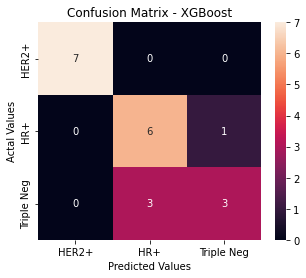

In [70]:
#Plotting the confusion matrix - XGBoost
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_test_xgb_df, annot=True)
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


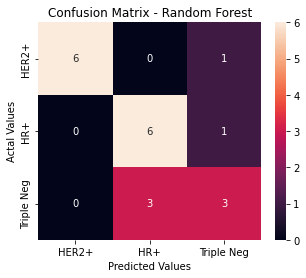

In [71]:
#Plotting the confusion matrix - Random Forest
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_test_rf_df, annot=True)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

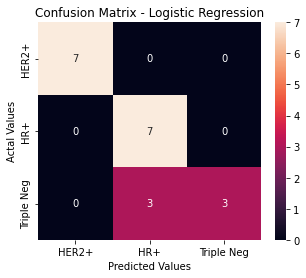

In [72]:
#Plotting the confusion matrix - Logistic Regression
plt.figure(figsize=(5,4))
sns.heatmap(confusion_mx_test_lr_df, annot=True)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [73]:
y_test.value_counts()

HR+           7
HER2+         7
Triple Neg    6
Name: Subgroup, dtype: int64

In [74]:
# Final result - XGBoost
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

f1_xgb_test = f1_score(lc_y_test, y_pred_test_xgb, average='micro')
precision_xgb_test = precision_score(lc_y_test, y_pred_test_xgb, average='micro')
recall_xgb_test = recall_score(lc_y_test, y_pred_test_xgb, average='micro')
accuracy_xgb_test = accuracy_score(lc_y_test, y_pred_test_xgb)

print('f1-score: ', f1_xgb_test)
print('Precision: ', precision_xgb_test)
print('Recall: ', recall_xgb_test)
print('Accuracy: ', accuracy_xgb_test)


f1-score:  0.8000000000000002
Precision:  0.8
Recall:  0.8
Accuracy:  0.8


In [75]:
# Final result - Random Forest
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

f1_rf_test = f1_score(y_test, y_pred_test_rf, average='micro')
precision_rf_test = precision_score(y_test, y_pred_test_rf, average='micro')
recall_rf_test = recall_score(y_test, y_pred_test_rf, average='micro')
accuracy_rf_test = accuracy_score(y_test, y_pred_test_rf)

print('f1-score: ', f1_rf_test)
print('Precision: ', precision_rf_test)
print('Recall: ', recall_rf_test)
print('Accuracy: ', accuracy_rf_test)


f1-score:  0.75
Precision:  0.75
Recall:  0.75
Accuracy:  0.75


In [76]:
# Final result - Logistic Regression
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

f1_lr_test = f1_score(y_test, y_pred_test_lr, average='micro')
precision_lr_test = precision_score(y_test, y_pred_test_lr, average='micro')
recall_lr_test = recall_score(y_test, y_pred_test_lr, average='micro')
accuracy_lr_test = accuracy_score(y_test, y_pred_test_lr)

print('f1-score: ', f1_lr_test)
print('Precision: ', precision_lr_test)
print('Recall: ', recall_lr_test)
print('Accuracy: ', accuracy_lr_test)

f1-score:  0.85
Precision:  0.85
Recall:  0.85
Accuracy:  0.85
